In [58]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import seaborn as sns
plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  (0.12 , 0.12, 0.12, 1),
    "axes.facecolor": (0.12 , 0.12, 0.12, 1),
})

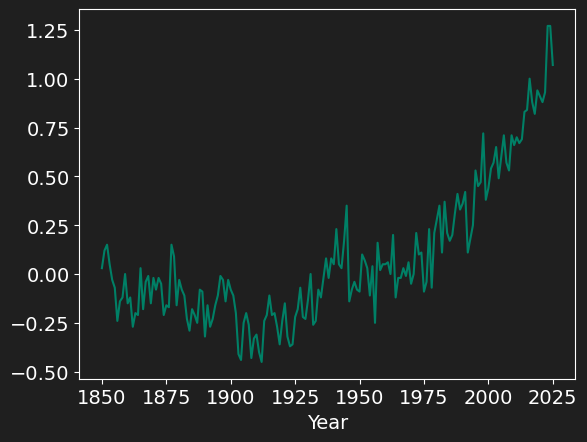

In [73]:
df = pd.read_csv("temperature.csv", index_col="Year")
df['Anomaly'].plot(cmap='summer')
plt.show()

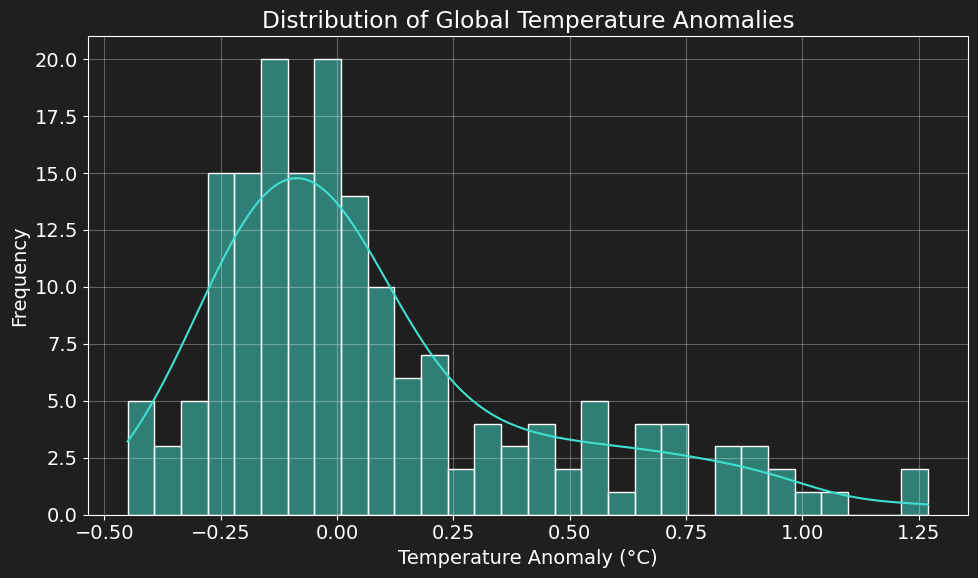

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Anomaly"], bins=30, kde=True, color="turquoise")
plt.title("Distribution of Global Temperature Anomalies")
plt.xlabel("Temperature Anomaly (°C)")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

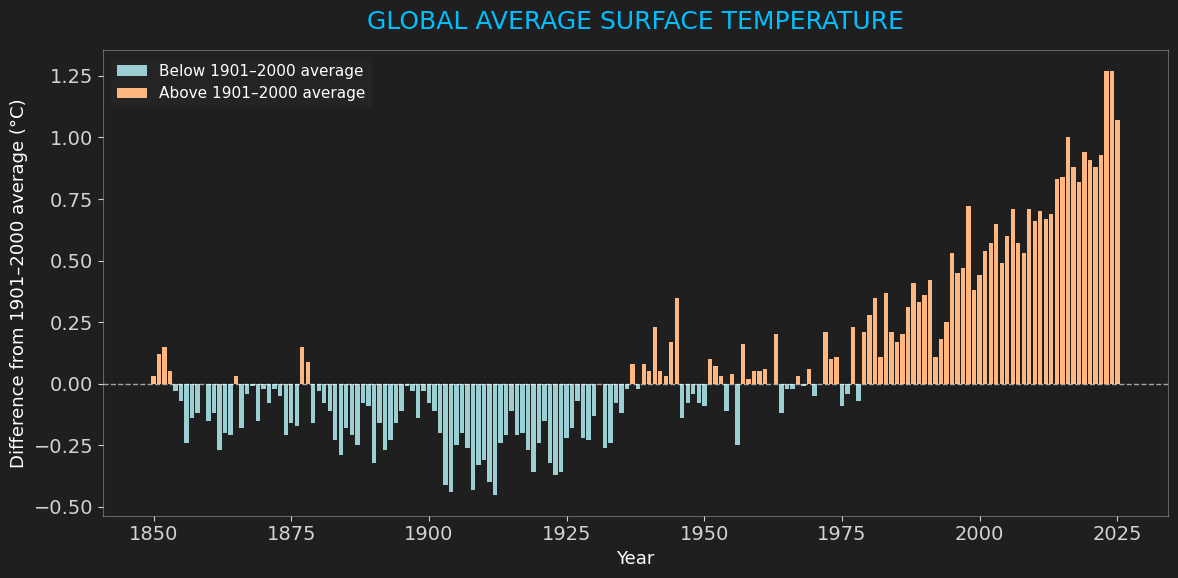

In [79]:
years = df.index
anomaly = df['Anomaly']
cold_color = sns.color_palette("icefire", as_cmap=True)(0.05)   # bleu glacier
warm_color = plt.cm.magma(0.85)                                 # rouge magma profond

# --- PLOT ---
fig, ax = plt.subplots(figsize=(12, 6))

# Barres négatives = bleu, positives = rouge
ax.bar(years[anomaly < 0], anomaly[anomaly < 0],
       color=cold_color, label='Below 1901–2000 average')
ax.bar(years[anomaly >= 0], anomaly[anomaly >= 0],
       color=warm_color, label='Above 1901–2000 average')

# Ligne de référence
ax.axhline(0, color='white', linewidth=1, alpha=0.6, linestyle='--')

# Titres et labels
ax.set_title("GLOBAL AVERAGE SURFACE TEMPERATURE", fontsize=18, color='deepskyblue', pad=15)
ax.set_xlabel("Year", fontsize=13)
ax.set_ylabel("Difference from 1901–2000 average (°C)", fontsize=13)

# Apparence
ax.tick_params(colors='lightgray')
for spine in ax.spines.values():
    spine.set_alpha(0.3)
ax.legend(facecolor=(0.15, 0.15, 0.15), edgecolor='none', loc='upper left', fontsize=11)

plt.tight_layout()
plt.show()

In [51]:
model = ARIMA(df['Anomaly'], order=(30, 1, 30))
res = model.fit()

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA paramete

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


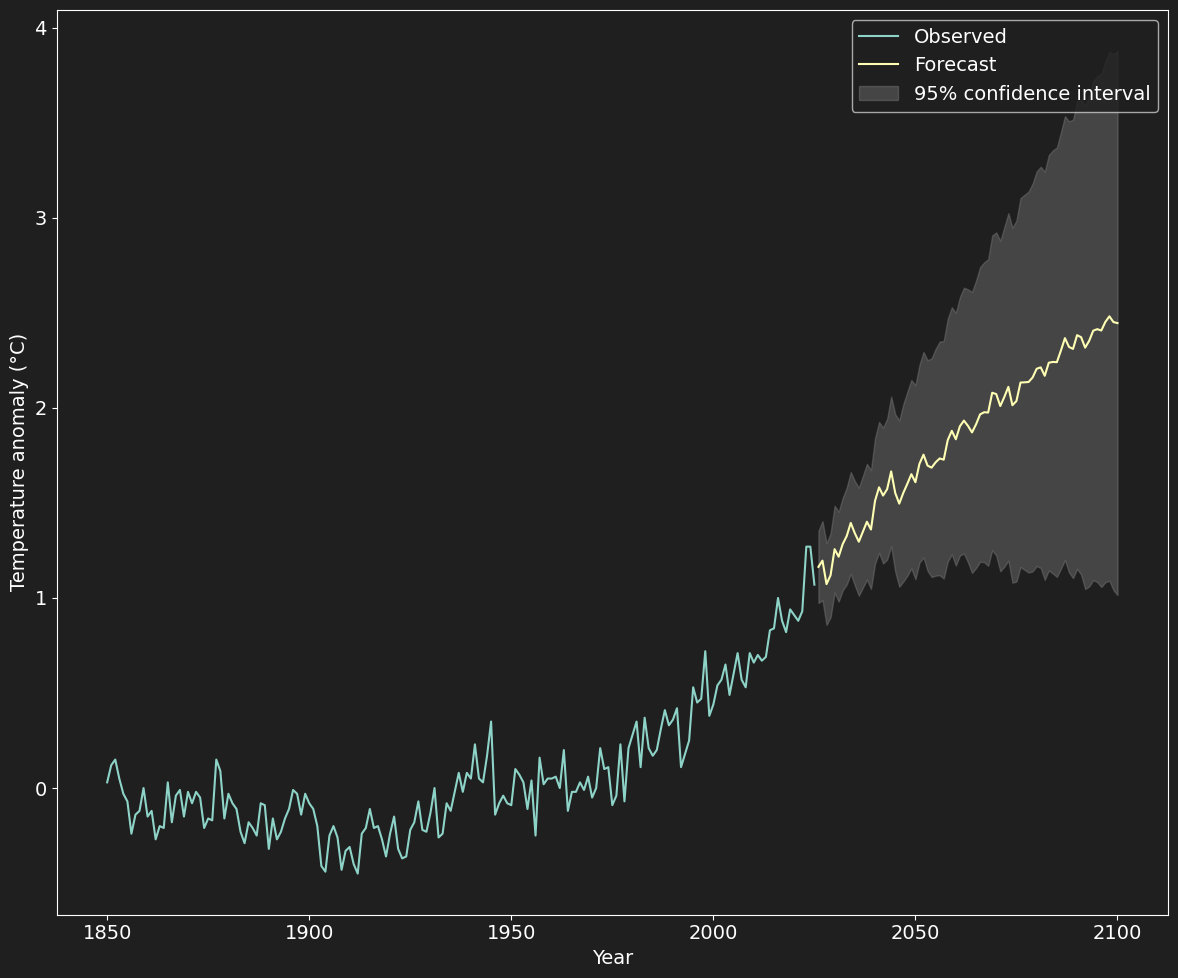

In [57]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.rcParams.update({'font.size': 14})
plt.plot(df['Anomaly'], label='Observed')
prediction = res.get_forecast(steps=75)
forecast = prediction.predicted_mean
conf_int = prediction.conf_int()

future_years = range(df.index[-1]+1, df.index[-1]+1+len(forecast))
plt.plot(future_years, forecast, label='Forecast')

# Intervalle de confiance
plt.fill_between(future_years,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='gray', alpha=0.4, label='95% confidence interval')

plt.xlabel("Year")
plt.ylabel("Temperature anomaly (°C)")
plt.legend()
plt.tight_layout()
plt.show()
plt.show()